In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Importing data

path = r'C:\Users\katro\World Happiness Report'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'whr.csv'))

In [8]:
# Dropping columns for analysis

df_2 = df.drop(columns = ['Country', 'Region', 'Happiness Range'])

In [9]:
# Using the elbow technique to identify number of clusters

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))]

score

C:\Users\katro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\katro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\katro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\katro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-41448149.25406749,
 -11516172.026908055,
 -5969683.972754516,
 -4031577.643353968,
 -3189360.2337442557,
 -2652383.499954655,
 -2178381.9226382035,
 -1675477.112279745,
 -1223552.4315129255]

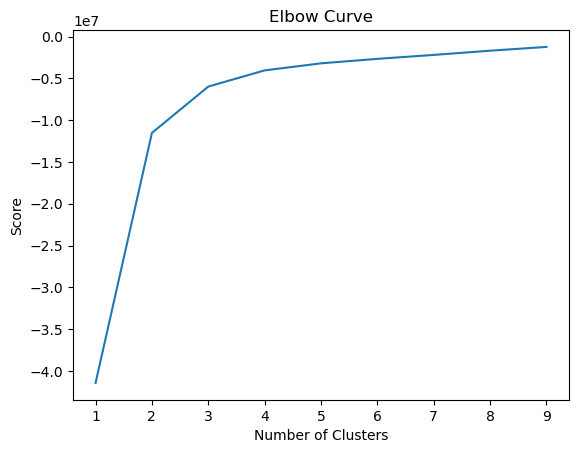

In [11]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will be using 3 clusters. As you can see in the Elbow Curve graph, there is a steep slope from 2 to 3 and then the line starts leveling out.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

C:\Users\katro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\katro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
df_2.head()

,Unnamed: 0,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
0,0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
3,3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
4,4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


In [19]:
df_2['clusters'].value_counts()

clusters
0    264
2    260
1    258
Name: count, dtype: int64

C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


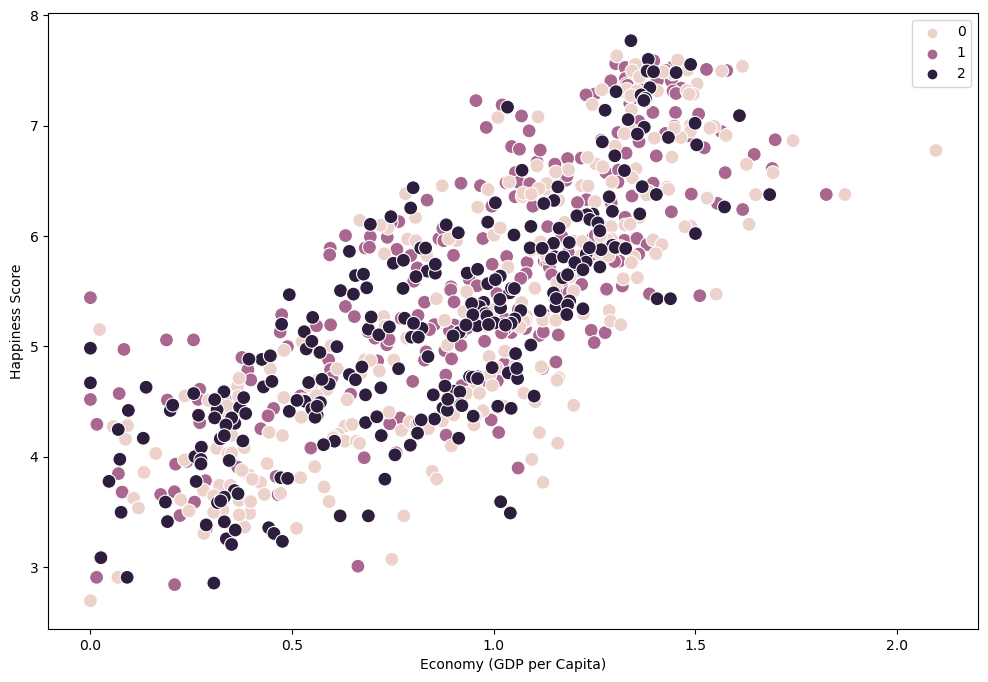

In [24]:
# Plot the clusters for the "Economy (GDP per Capita)" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Economy (GDP per Capita)'], y=df_2['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


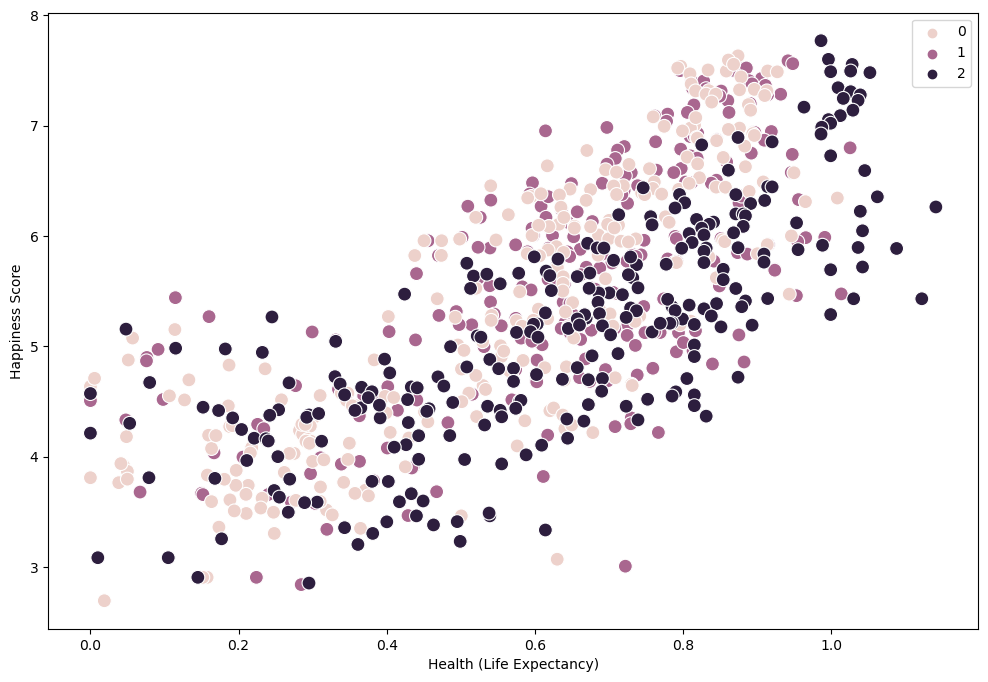

In [25]:
# Plot the clusters for the "Health (Life Expectancy)" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Health (Life Expectancy)'], y=df_2['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()

C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


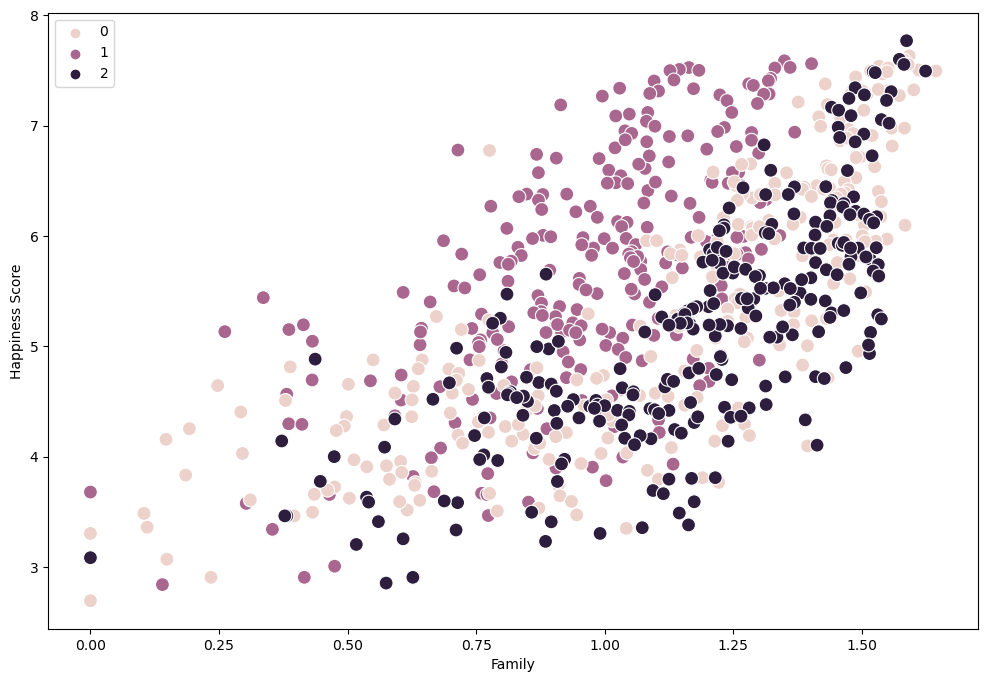

In [26]:
# Plot the clusters for the "Family" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Family'], y=df_2['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

There is not pattern to the clusters in any of the scatterplots. There is a wide variance between them all. The clusters don't give any addition insight to the data.

In [33]:
# Descriptive statistics of the clusters

df_2.groupby('clusters').agg({'Economy (GDP per Capita)':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median'], 
                         'Family':['mean', 'median'],
                          'Happiness Score':['mean', 'median']})

Economy (GDP per Capita)           Health (Life Expectancy)  \
                             mean    median                     mean   
clusters                                                               
0                        0.946051  1.008558                 0.553474   
1                        0.970371  1.038910                 0.650255   
2                        0.831677  0.883500                 0.634715   

                      Family           Happiness Score          
            median      mean    median            mean  median  
clusters                                                        
0         0.610606  1.105705  1.228321        5.344121  5.2655  
1         0.690675  0.962310  1.001760        5.649713  5.7020  
2         0.670000  1.165850  1.221000        5.145838  5.1800

Cluster 2 has the highest means, except for in family.